In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NO2']

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=11)

In [54]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=5,
                                      max_features='auto',
                                      min_samples_split=8,
                                      min_samples_leaf=10,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                          min_samples_split=8, n_estimators=1000)

In [55]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9921091942026147

Score on test data: 0.7201700835472005

Root Mean Squared Error: 13.564465473199668

Overall model accuracy: 0.7201700835472005


In [56]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [57]:
predict=grad_boost.predict(X)

In [58]:
predict

array([41.60655185, 42.22704523, 32.16026685, 35.08169834, 38.69330529,
       42.5948314 , 37.54648151, 53.13525218, 51.69029821, 52.19120139,
       41.17344608, 36.97478586, 38.86433233, 49.4033491 , 45.02884842,
       42.69378082, 48.89826682, 42.97671594, 40.49568577, 59.0446334 ,
       49.22121598, 45.3084847 , 32.73252959, 44.50700039, 36.50779685,
       26.27940287, 32.94405662, 34.65708621, 25.5761979 , 30.23289314,
       31.68022589, 32.87036793, 30.85426153, 28.17329034,  6.33904891,
       35.46744661, 40.87679547, 24.35934433, 38.83444428, 41.26982717,
       58.07343845, 57.80624986, 45.13746006, 46.74062395, 53.60062927,
       49.60387378, 41.26313383, 23.43612346, 47.57954585, 34.99108052,
       27.44424934, 28.54434228])

In [59]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [60]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [61]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [62]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

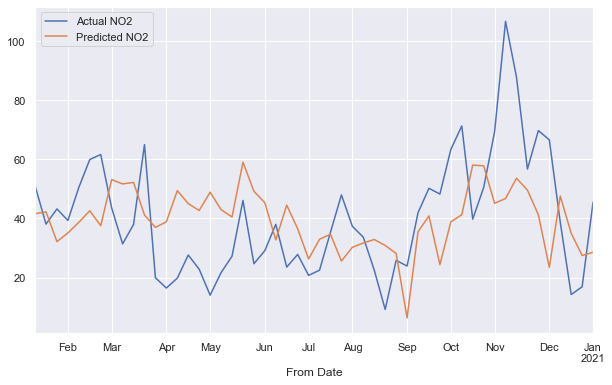

In [63]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')

In [64]:
np.sqrt(mean_squared_error(test['NO2'],X['pred']))

20.337364783083768

In [65]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 11.309892996176826
MSE: 183.9947235736259
RMSE: 13.564465473199668
R-Squared: 0.7201700835472005


In [66]:
mae = metrics.mean_absolute_error(test['NO2'],X['pred'])
mse = metrics.mean_squared_error(test['NO2'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO2'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 17.096936002295323
MSE: 413.6084063202158
RMSE: 20.337364783083768
R-Squared: -0.04040305624047824


In [67]:
import pickle
filename = 'NO2_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [68]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7201700835472005


# 3rd plot

In [69]:
testcase = pd.DataFrame()

In [70]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [71]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [72]:
testcase

,test,pred,Corrected
262,86.725714,91.389739,77.825273
154,104.825000,95.976348,109.540813
249,72.955714,70.317294,83.881760
359,28.337143,57.017395,43.452929
226,46.694286,66.304307,52.739841
...,...,...,...
296,13.055714,24.246501,10.682035
257,124.638571,136.195403,122.630937
271,74.798571,59.685038,73.249503
274,85.032857,86.747670,73.183205


In [73]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [74]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.9042407888411069

In [75]:
test2020=pd.DataFrame()

In [76]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [77]:
test2020.index=test.index

In [78]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

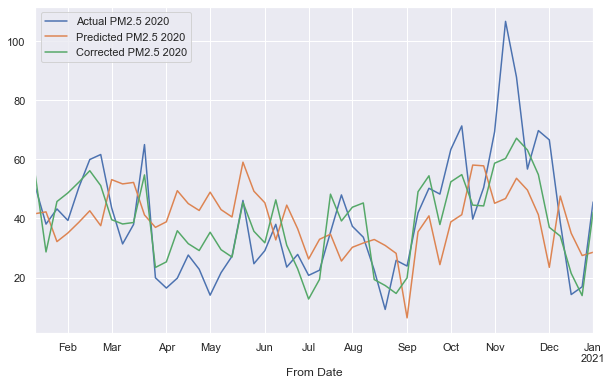

In [79]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [80]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.30562494387139116